In [1]:
import os
import glob
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from typing import List


%matplotlib inline
%config IPCompleter.use_jedi = False

In [ ]:
## pandas básico

In [3]:
arrelgo = np.arange(0, 20, 0.5)
pd.Series(arrelgo)

0      0.0
1      0.5
2      1.0
3      1.5
4      2.0
5      2.5
6      3.0
7      3.5
8      4.0
9      4.5
10     5.0
11     5.5
12     6.0
13     6.5
14     7.0
15     7.5
16     8.0
17     8.5
18     9.0
19     9.5
20    10.0
21    10.5
22    11.0
23    11.5
24    12.0
25    12.5
26    13.0
27    13.5
28    14.0
29    14.5
30    15.0
31    15.5
32    16.0
33    16.5
34    17.0
35    17.5
36    18.0
37    18.5
38    19.0
39    19.5
dtype: float64

In [7]:
data = {'Edad': [1,2,3,4],
        'Estatura': [1.55, 2.0, 1.76, 1.6],
        'Genero':['m', 'f', 'm', 'f']}
df_data = pd.DataFrame(data)
df_data

,Edad,Estatura,Genero
0,1,1.55,m
1,2,2.00,f
2,3,1.76,m
3,4,1.60,f


In [11]:
df_data[df_data.Genero == 'm']

,Edad,Estatura,Genero
0,1,1.55,m
2,3,1.76,m


In [30]:
df_data.Genero.unique()

array(['m', 'f'], dtype=object)

In [39]:
df_est = df_data.groupby(['Genero', 'NE'], as_index=False).Estatura.mean()
# df_est.loc['f']
df_est

,Genero,NE,Estatura
0,f,P,2.00
1,f,U,1.60
2,m,P,1.55
3,m,S,1.76


In [37]:
df_data

,Edad,Estatura,Genero,NE,NSE
0,1,1.55,m,P,A
1,2,2.00,f,P,C+
2,3,1.76,m,S,D
3,4,1.60,f,U,A


In [36]:
df_est

Genero
f    1.800
m    1.655
Name: Estatura, dtype: float64

In [14]:
df_data = df_data.assign(
    NE=['P', 'P', 'S', 'U']
)

df_data

,Edad,Estatura,Genero,NE
0,1,1.55,m,P
1,2,2.00,f,P
2,3,1.76,m,S
3,4,1.60,f,U


In [16]:
df_data.loc[:, 'NSE'] = ['A', 'C+', 'D', 'A']
df_data

,Edad,Estatura,Genero,NE,NSE
0,1,1.55,m,P,A
1,2,2.00,f,P,C+
2,3,1.76,m,S,D
3,4,1.60,f,U,A


In [29]:
df_data.dtypes

Edad          int64
Estatura    float64
Genero       object
NE           object
NSE          object
dtype: object

In [23]:
df_data['NSE']

0     A
1    C+
2     D
3     A
Name: NSE, dtype: object

In [20]:
df_data[1:]

,Edad,Estatura,Genero,NE,NSE
1,2,2.00,f,P,C+
2,3,1.76,m,S,D
3,4,1.60,f,U,A


In [15]:
df_data[(df_data.Genero == 'f') & (df_data.NE == 'P')]

,Edad,Estatura,Genero,NE
1,2,2.0,f,P


## Viajes de Ecobici

In [40]:
df_viajes = pd.read_csv('data/ecobici/2017-06.csv')
print(df_viajes.shape)
df_viajes.head()

(853650, 9)


,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo
0,F,34,9287,449,01/06/2017,0:00:14,19,01/06/2017,0:13:57
1,F,22,9379,64,01/06/2017,0:00:32,56,01/06/2017,0:03:55
2,M,24,2365,74,01/06/2017,0:01:24,23,01/06/2017,0:10:04
3,M,47,7931,65,01/06/2017,0:01:45,73,01/06/2017,0:29:44
4,M,43,8512,384,01/06/2017,0:01:51,299,01/06/2017,0:19:40


In [41]:
df_viajes.dtypes

Genero_Usuario           object
Edad_Usuario              int64
Bici                      int64
Ciclo_Estacion_Retiro     int64
Fecha_Retiro             object
Hora_Retiro              object
Ciclo_Estacion_Arribo     int64
Fecha_Arribo             object
Hora_Arribo              object
dtype: object

## Procesar archivos

In [44]:
[i for i in range(0, 10) if i % 2 == 0]

[0, 2, 4, 6, 8]

In [ ]:

def procesar_datos(archivos: List[str]):
    """Concatenar y limpiar base de datos"""
    dfs = [
        pd.read_csv(path, dtype={'Bici': str})
        for path in archivos
    ]
    df = pd.concat(dfs, axis=0, ignore_index=True)
    # parse dates
    df = df.assign(
        Fecha_Retiro=df.Fecha_Retiro + ' ' + df.Hora_Retiro,
        Fecha_Arribo=df.Fecha_Arribo + ' ' + df.Hora_Arribo,
    ).drop(['Hora_Retiro', 'Hora_Arribo'], axis=1)
    df = df.assign(
        Fecha_Retiro=pd.to_datetime(df.Fecha_Retiro, 
                                    format='%d/%m/%Y %H:%M:%S'),
        Fecha_Arribo=pd.to_datetime(df.Fecha_Arribo,
                                    format='%d/%m/%Y %H:%M:%S'),
    )
    delta = df.Fecha_Arribo - df.Fecha_Retiro
    duracion_viaje = (delta.dt.seconds / 60).round().astype(int)
    df = df.assign(duracion_viaje=duracion_viaje)
    return df

archivos = glob.glob('data/ecobici/*.csv')
print(archivos)
df_viajes = procesar_datos(archivos)
print(df_viajes.shape)
df_viajes.head()

In [ ]:
df_test = df_viajes.assign(mes=df_viajes.Fecha_Retiro.dt.month)
df_test.groupby('mes').Bici.count().plot.bar()

In [ ]:
df_test = df_viajes.assign(mes=df_viajes.Fecha_Retiro.dt.month)
df_test.groupby('mes').Bici.count().plot.bar()

## Archivo parquet

In [2]:
## guardar como parquet
# df_viajes.to_parquet('data/viajes_ecobici.parquet', engine='pyarrow')

# Leer parquet
df_viajes = pd.read_parquet('data/viajes_ecobici.parquet', 
                            engine='pyarrow')
print(df_viajes.shape)
df_viajes.head()

(3342953, 8)


,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,duracion_viaje
0,M,22,9280,144,2017-05-01 00:00:15,448,2017-05-01 00:09:13,9
1,M,31,4389,10,2017-05-01 00:00:23,131,2017-05-01 00:21:52,21
2,F,49,1754,86,2017-05-01 00:01:22,1,2017-05-01 00:10:20,9
3,M,23,2333,316,2017-05-01 00:03:06,304,2017-05-01 00:06:22,3
4,M,30,6990,385,2017-05-01 00:03:29,135,2017-05-01 00:35:03,32


In [47]:
df_viajes.groupby('Genero_Usuario').Bici.count()

Genero_Usuario
F     822692
M    2520261
Name: Bici, dtype: int64

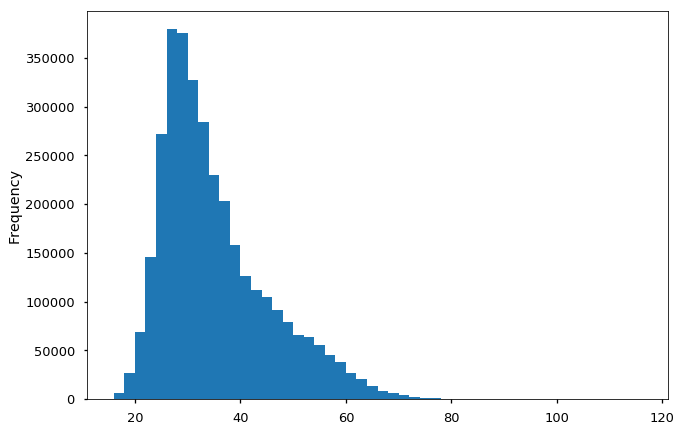

In [48]:
with plt.style.context('seaborn-talk'):
    df_viajes.Edad_Usuario.plot.hist(bins=50)

In [49]:
df_viajes.Edad_Usuario.describe()

count    3.342953e+06
mean     3.467190e+01
std      1.023785e+01
min      1.600000e+01
25%      2.700000e+01
50%      3.200000e+01
75%      4.000000e+01
max      1.160000e+02
Name: Edad_Usuario, dtype: float64

In [50]:
df_viajes.groupby('Genero_Usuario').Edad_Usuario.mean()

Genero_Usuario
F    32.879218
M    35.257091
Name: Edad_Usuario, dtype: float64

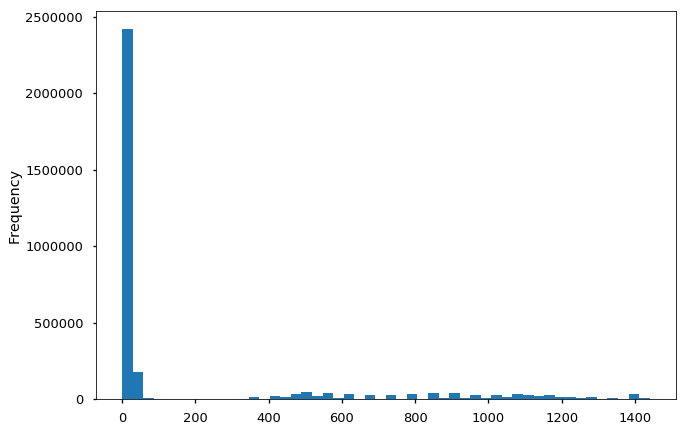

In [51]:
with plt.style.context('seaborn-talk'):
    df_viajes.duracion_viaje.plot.hist(bins=50)

In [52]:
df_viajes.duracion_viaje.describe()

count    3.342953e+06
mean     1.941654e+02
std      3.682641e+02
min      0.000000e+00
25%      8.000000e+00
50%      1.400000e+01
75%      3.400000e+01
max      1.440000e+03
Name: duracion_viaje, dtype: float64

In [53]:
# Filtrar
df_viajes = df_viajes.loc[df_viajes.duracion_viaje <= 60]
df_viajes = df_viajes.loc[df_viajes.duracion_viaje > 2]
print(df_viajes.shape)
df_viajes.duracion_viaje.describe()

(2559566, 8)


count    2.559566e+06
mean     1.319341e+01
std      8.811130e+00
min      3.000000e+00
25%      7.000000e+00
50%      1.100000e+01
75%      1.700000e+01
max      6.000000e+01
Name: duracion_viaje, dtype: float64

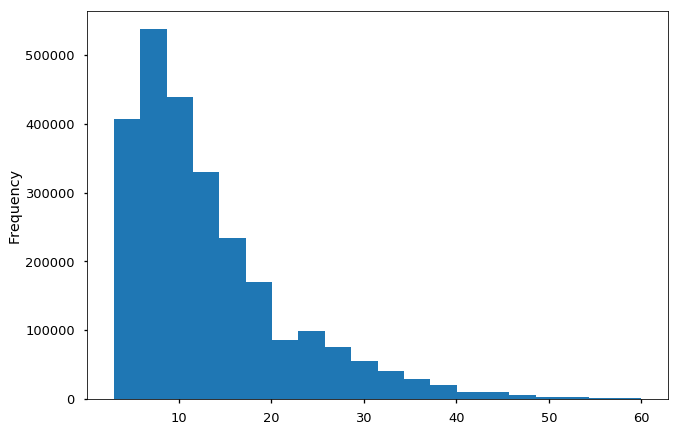

In [54]:
with plt.style.context('seaborn-talk'):
    df_viajes.duracion_viaje.plot.hist(bins=20)

In [63]:
# df_viajes.Fecha_Retiro.dt.dayofweek

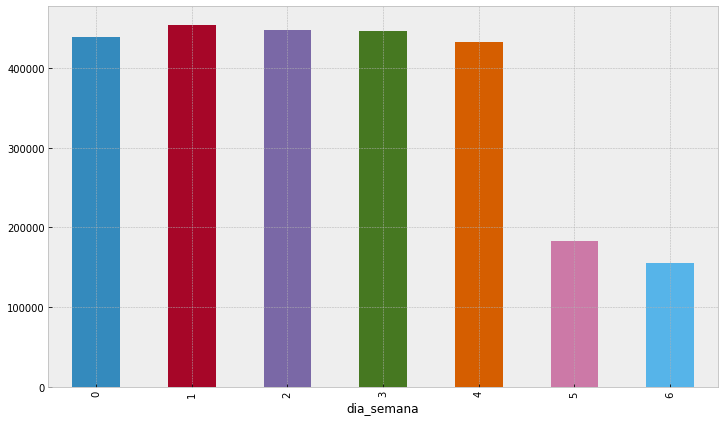

In [55]:
df_viajes = df_viajes.assign(
    dia_semana=df_viajes.Fecha_Retiro.dt.dayofweek
)

with plt.style.context('bmh'):
    df_viajes.groupby('dia_semana').Bici.count().plot.bar(figsize=(12, 7))

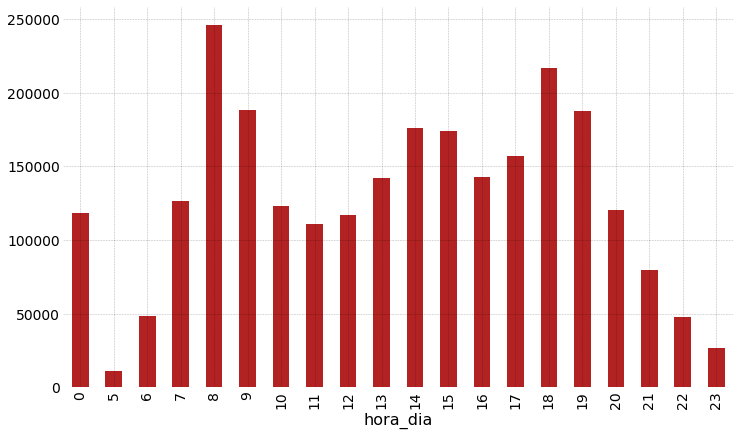

In [64]:
df_viajes = df_viajes.assign(hora_dia=df_viajes.Fecha_Retiro.dt.hour)
with plt.style.context('randy_olson_style'):
    df_viajes.groupby('hora_dia').Bici.count().plot.bar(figsize=(12, 7), color='firebrick')

In [66]:
dias_semana

{0: 'Lunes',
 1: 'Martes',
 2: 'Miercoles',
 3: 'Jueves',
 4: 'Viernes',
 5: 'Sabado',
 6: 'Domingo'}

In [65]:

dias_semana = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']
dias_semana = {i: d for i, d in enumerate(dias_semana)}
df_viajes = df_viajes.assign(
    dia_semana=df_viajes.dia_semana.map(dias_semana)
)
df_viajes.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,duracion_viaje,dia_semana,hora_dia
0,M,22,9280,144,2017-05-01 00:00:15,448,2017-05-01 00:09:13,9,Lunes,0
1,M,31,4389,10,2017-05-01 00:00:23,131,2017-05-01 00:21:52,21,Lunes,0
2,F,49,1754,86,2017-05-01 00:01:22,1,2017-05-01 00:10:20,9,Lunes,0
3,M,23,2333,316,2017-05-01 00:03:06,304,2017-05-01 00:06:22,3,Lunes,0
4,M,30,6990,385,2017-05-01 00:03:29,135,2017-05-01 00:35:03,32,Lunes,0


In [ ]:
# df_viajes.dia_semana.value_counts(dropna=False)

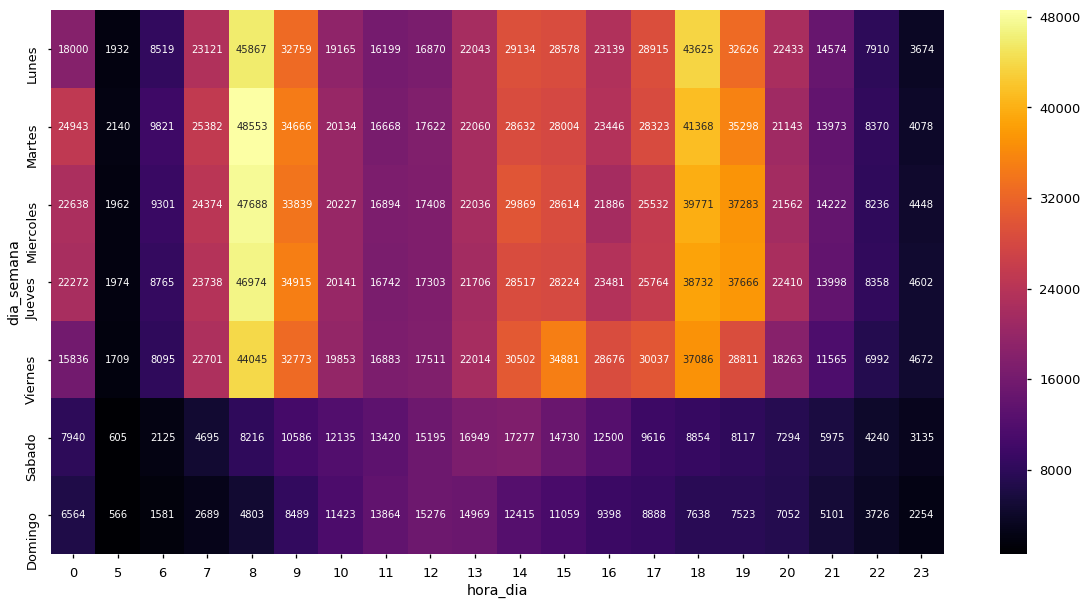

In [70]:
# heatmap

with plt.style.context('seaborn-talk'):
    
    df_table = (df_viajes.groupby(['dia_semana', 'hora_dia'], as_index=False)
                         .Bici.count()
                         .pivot(index='dia_semana',
                                columns='hora_dia',
                                values='Bici'))
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20, 10))
    sns.heatmap(df_table.reindex(dias_semana.values()), cmap='inferno', annot=True, fmt='d', ax=ax)
    

In [71]:
df_table

hora_dia,0,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
dia_semana,,,,,,,,,,,,,,,,,,,,
Domingo,6564,566,1581,2689,4803,8489,11423,13864,15276,14969,12415,11059,9398,8888,7638,7523,7052,5101,3726,2254
Jueves,22272,1974,8765,23738,46974,34915,20141,16742,17303,21706,28517,28224,23481,25764,38732,37666,22410,13998,8358,4602
Lunes,18000,1932,8519,23121,45867,32759,19165,16199,16870,22043,29134,28578,23139,28915,43625,32626,22433,14574,7910,3674
Martes,24943,2140,9821,25382,48553,34666,20134,16668,17622,22060,28632,28004,23446,28323,41368,35298,21143,13973,8370,4078
Miercoles,22638,1962,9301,24374,47688,33839,20227,16894,17408,22036,29869,28614,21886,25532,39771,37283,21562,14222,8236,4448
Sabado,7940,605,2125,4695,8216,10586,12135,13420,15195,16949,17277,14730,12500,9616,8854,8117,7294,5975,4240,3135
Viernes,15836,1709,8095,22701,44045,32773,19853,16883,17511,22014,30502,34881,28676,30037,37086,28811,18263,11565,6992,4672


In [ ]:

with plt.style.context('seaborn-talk'):
    gp = df_viajes.groupby('')

In [72]:
df_serie_tiempo = df_viajes.set_index('Fecha_Retiro')
df_serie_tiempo.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,duracion_viaje,dia_semana,hora_dia
Fecha_Retiro,,,,,,,,,
2017-05-01 00:00:15,M,22,9280,144,448,2017-05-01 00:09:13,9,Lunes,0
2017-05-01 00:00:23,M,31,4389,10,131,2017-05-01 00:21:52,21,Lunes,0
2017-05-01 00:01:22,F,49,1754,86,1,2017-05-01 00:10:20,9,Lunes,0
2017-05-01 00:03:06,M,23,2333,316,304,2017-05-01 00:06:22,3,Lunes,0
2017-05-01 00:03:29,M,30,6990,385,135,2017-05-01 00:35:03,32,Lunes,0


In [73]:
df_serie_tiempo.loc['2017-05-01':'2017-05-05']

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,duracion_viaje,dia_semana,hora_dia
Fecha_Retiro,,,,,,,,,
2017-05-01 00:00:15,M,22,9280,144,448,2017-05-01 00:09:13,9,Lunes,0
2017-05-01 00:00:23,M,31,4389,10,131,2017-05-01 00:21:52,21,Lunes,0
2017-05-01 00:01:22,F,49,1754,86,1,2017-05-01 00:10:20,9,Lunes,0
2017-05-01 00:03:06,M,23,2333,316,304,2017-05-01 00:06:22,3,Lunes,0
2017-05-01 00:03:29,M,30,6990,385,135,2017-05-01 00:35:03,32,Lunes,0
2017-05-01 00:03:31,M,25,8705,123,375,2017-05-01 00:22:19,19,Lunes,0
2017-05-01 00:03:42,M,40,2341,351,327,2017-05-01 00:10:03,6,Lunes,0
2017-05-01 00:04:15,M,26,1636,189,50,2017-05-01 00:18:11,14,Lunes,0
2017-05-01 00:04:30,M,30,1961,189,50,2017-05-01 00:18:06,14,Lunes,0


In [ ]:
## Slice index

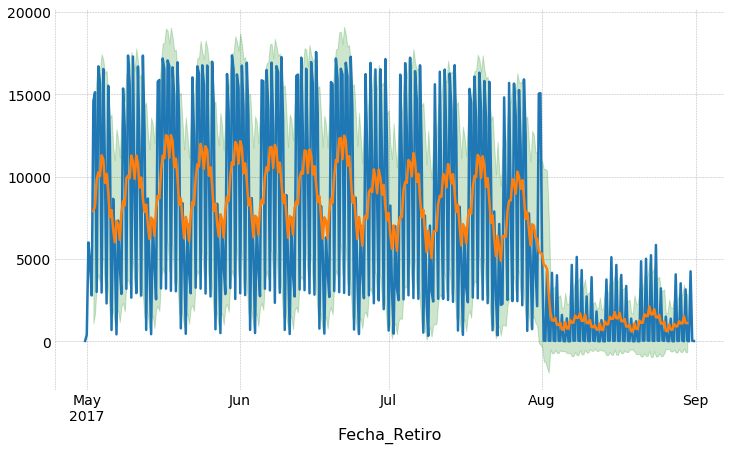

In [75]:
with plt.style.context('randy_olson_style'):
    df_ts = df_serie_tiempo.resample('8H').Bici.count()
    ts_mean = df_ts.rolling(10, center=True).mean()
    ts_std = df_ts.rolling(10, center=True).std()
    ax = df_ts.plot()
    ax = ts_mean.plot()
    plt.fill_between(df_ts.index,
                     ts_mean - (1 * ts_std),
                     ts_mean + (1 * ts_std),
                     color='g', alpha=0.2)

In [ ]:
## Ejercicio
## heamap de retiro-arribo


# mask = np.zeros_like(df_aux, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

## Conseguir Lat y Lons de estaciones

In [ ]:
def pedir_info_estaciones(client_id: str, client_secret: str):
    """Pide la información de las estaciones de ecobici."""
    data = {'client_id': client_id,
            'client_secret': client_secret,
            'grant_type': 'client_credentials'}
    # pedir token
    response = requests.get(
        url='https://pubsbapi.smartbike.com/oauth/v2/token',
        params=data)
    if response.status_code != 200:
        raise IOError(
            'No se pudo conseguir token. '
            'Respuesta diferente de 200'
        )
    acces_token = response.json()['access_token']
    # pedir datos de estaciones
    response = requests.get(
        url='https://pubsbapi.smartbike.com/api/v1/stations.json',
        params={'access_token': acces_token}
    )
    if response.status_code != 200:
        raise IOError(
            'No se pudo conseguir info de estaciones. '
            'Respuesta diferente de 200'
        )
    estaciones_json = response.json()['stations']
    return estaciones_json


client_id = os.environ.get('ECOBICI_CLIENT_ID')
client_secret = os.environ.get('ECOBICI_CLIENT_SECRET')

estaciones_json = pedir_info_estaciones(client_id, client_secret)
df_estaciones = pd.io.json.json_normalize(estaciones_json)
df_estaciones.head()

In [ ]:
# df_estaciones = (df_estaciones.rename(columns={'location.lat': 'latitud',
#                                               'location.lon': 'longitud',
#                                               'id': 'estacion_id'})
#                               .loc[:, ['estacion_id', 'latitud', 'longitud']])
# df_estaciones.to_csv('data/estaciones_ecobici.csv', index=False, encoding='utf-8', quoting=1)
# df_estaciones.head()

In [3]:
df_estaciones = pd.read_csv('data/estaciones_ecobici.csv')
print(df_estaciones.shape)
df_estaciones.head()

(452, 3)


,estacion_id,latitud,longitud
0,448,19.426611,-99.144470
1,443,19.359655,-99.162025
2,416,19.371308,-99.177607
3,437,19.364808,-99.176022
4,438,19.364797,-99.174583


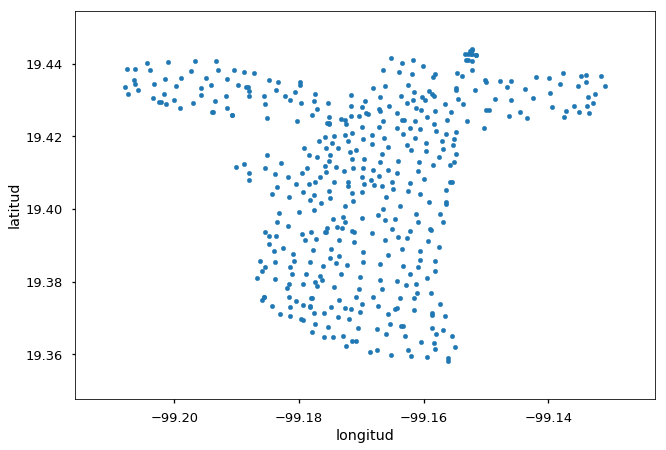

In [77]:
with plt.style.context('seaborn-talk'):
    df_estaciones.plot.scatter(x='longitud', y='latitud')

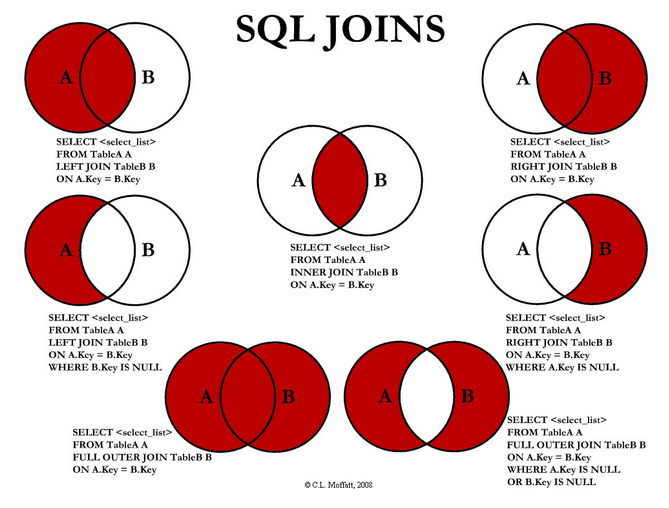

In [78]:
from IPython.display import Image
Image('SQL.png')

In [4]:

columnas = ['Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'duracion_viaje']

df_viajes = df_viajes.loc[(df_viajes.duracion_viaje >= 2) & (df_viajes.duracion_viaje < 60)]
df_viajes = df_viajes.loc[:, columnas]
df_viajes.head()

,Ciclo_Estacion_Retiro,Fecha_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,duracion_viaje
0,144,2017-05-01 00:00:15,448,2017-05-01 00:09:13,9
1,10,2017-05-01 00:00:23,131,2017-05-01 00:21:52,21
2,86,2017-05-01 00:01:22,1,2017-05-01 00:10:20,9
3,316,2017-05-01 00:03:06,304,2017-05-01 00:06:22,3
4,385,2017-05-01 00:03:29,135,2017-05-01 00:35:03,32


In [5]:
df_viajes_coords = pd.merge(df_viajes,
                            df_estaciones,
                            how='inner',
                            left_on='Ciclo_Estacion_Retiro',
                            right_on='estacion_id')

df_viajes_coords = df_viajes_coords.drop('estacion_id', axis=1)
df_viajes_coords = df_viajes_coords.rename(columns={'latitud': 'latitud_retiro',
                                                    'longitud': 'longitud_retiro'})
df_viajes_coords

,Ciclo_Estacion_Retiro,Fecha_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,duracion_viaje,latitud_retiro,longitud_retiro
0,144,2017-05-01 00:00:15,448,2017-05-01 00:09:13,9,19.415192,-99.154837
1,144,2017-05-01 06:50:22,44,2017-05-01 07:03:27,13,19.415192,-99.154837
2,144,2017-05-01 07:03:55,170,2017-05-01 07:24:50,21,19.415192,-99.154837
3,144,2017-05-01 07:04:17,144,2017-05-01 07:07:55,4,19.415192,-99.154837
4,144,2017-05-01 07:49:33,21,2017-05-01 08:03:48,14,19.415192,-99.154837
5,144,2017-05-01 10:24:31,210,2017-05-01 10:59:26,35,19.415192,-99.154837
6,144,2017-05-01 11:21:46,144,2017-05-01 11:42:38,21,19.415192,-99.154837
7,144,2017-05-01 11:44:21,51,2017-05-01 11:56:26,12,19.415192,-99.154837
8,144,2017-05-01 11:45:39,54,2017-05-01 11:59:27,14,19.415192,-99.154837
9,144,2017-05-01 12:50:12,145,2017-05-01 12:55:38,5,19.415192,-99.154837


In [6]:
df_viajes_coords = pd.merge(df_viajes_coords,
                            df_estaciones,
                            how='inner',
                            left_on='Ciclo_Estacion_Arribo',
                            right_on='estacion_id')

df_viajes_coords = df_viajes_coords.rename(columns={'latitud': 'latitud_arribo',
                                                    'longitud': 'longitud_arribo'})

df_viajes_coords.head()

,Ciclo_Estacion_Retiro,Fecha_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,duracion_viaje,latitud_retiro,longitud_retiro,estacion_id,latitud_arribo,longitud_arribo
0,144,2017-05-01 00:00:15,448,2017-05-01 00:09:13,9,19.415192,-99.154837,448,19.426611,-99.14447
1,144,2017-05-03 15:26:20,448,2017-05-03 15:44:44,18,19.415192,-99.154837,448,19.426611,-99.14447
2,144,2017-05-03 23:26:39,448,2017-05-03 23:36:09,10,19.415192,-99.154837,448,19.426611,-99.14447
3,144,2017-05-05 22:45:22,448,2017-05-05 22:57:42,12,19.415192,-99.154837,448,19.426611,-99.14447
4,144,2017-05-07 23:02:49,448,2017-05-07 23:11:30,9,19.415192,-99.154837,448,19.426611,-99.14447


## Buenas prácticas

In [ ]:
# funciona pero es muy lento (3m 48s)
def calcular_dist_apply(row):
    delta_lon = row.longitud_retiro - row.longitud_arribo
    delta_lat = row.latitud_retiro - row.latitud_arribo
    return sqrt(delta_lon ** 2 + delta_lat ** 2)

distancia = df_viajes_coords.apply(calcular_dist_apply, axis=1)

In [ ]:
distancia.describe()

In [ ]:

delta_lat = df_viajes_coords.latitud_retiro - df_viajes_coords.latitud_arribo
delta_lon = df_viajes_coords.longitud_retiro - df_viajes_coords.longitud_arribo
distancia = delta_lat ** 2 + delta_lon ** 2
distancia = np.sqrt(distancia)

In [ ]:
distancia.describe()

In [ ]:

def calcular_distancias(df):
    df = df.copy()
    delta_lat = df_viajes_coords.latitud_retiro - df_viajes_coords.latitud_arribo
    delta_lon = df_viajes_coords.longitud_retiro - df_viajes_coords.longitud_arribo
    distancia = delta_lat ** 2 + delta_lon ** 2
    distancia = np.sqrt(distancia)
    return distancia

distancia = calcular_distancias(df_viajes_coords)